In [56]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from scipy import stats

In [57]:
#import CSV
df = pd.read_csv('correct_output.csv')
df.head()

,School Name,School ID,School Type,School Size,10 Year Median Earnings,10 Year Mean Earnings,Lat,Lng,City,State,SAT Scores,ACT Scores,Admission Rate,Average Gross Cost,Average Net Price,Locale
0,University of California-Merced,445188,Public,7375.0,NaN,NaN,37.366237,-120.424944,Merced,CA,1114.0,24.0,0.6979,34330.0,13223.0,41.0
1,University of Southern California,123961,Private,18942.0,74000.0,88800.0,34.021281,-118.284169,Los Angeles,CA,1437.0,32.0,0.1595,69547.0,30232.0,11.0
2,West Los Angeles College,125471,Public,9622.0,31500.0,37300.0,34.004512,-118.386664,Culver City,CA,NaN,NaN,NaN,13255.0,6823.0,21.0
3,Pueblo Community College,127884,Public,3641.0,27700.0,31900.0,38.262124,-104.636258,Pueblo,CO,NaN,NaN,NaN,20783.0,14860.0,12.0
4,University of Colorado Boulder,126614,Public,28565.0,50800.0,59700.0,40.008781,-105.270823,Boulder,CO,1293.0,28.0,0.7984,29215.0,20706.0,12.0


In [58]:
#Clean and Streamline Dataframe
locale_df = df[['School Name','Locale','10 Year Median Earnings']]
locale_df = locale_df.dropna()
locale_df.head()

,School Name,Locale,10 Year Median Earnings
1,University of Southern California,11.0,74000.0
2,West Los Angeles College,21.0,31500.0
3,Pueblo Community College,12.0,27700.0
4,University of Colorado Boulder,12.0,50800.0
5,Colorado Mountain College,33.0,32700.0


In [59]:
#Seperate Data by Locale Type
large_city_locale_df = locale_df.loc[locale_df.Locale == 11.0]
large_suburb_locale_df = locale_df.loc[locale_df.Locale == 21.0]
midsize_city_locale_df = locale_df.loc[locale_df.Locale == 12.0]
midsize_suburb_locale_df = locale_df.loc[locale_df.Locale == 22.0]
small_city_locale_df = locale_df.loc[locale_df.Locale == 13.0]
small_suburb_locale_df = locale_df.loc[locale_df.Locale == 23.0]
rural_locale_df = locale_df.loc[locale_df.Locale > 40]

In [60]:
large_city_locale_df.head()

,School Name,Locale,10 Year Median Earnings
1,University of Southern California,11.0,74000.0
6,Colorado Technical University-Colorado Springs,11.0,42200.0
18,The University of Tampa,11.0,48600.0
20,University of South Florida-Main Campus,11.0,43500.0
21,Valencia College,11.0,32600.0


In [61]:
#Set Variables for Mean of each Locale Type
large_city_earn = large_city_locale_df["10 Year Median Earnings"].mean()
large_suburb_earn = large_suburb_locale_df['10 Year Median Earnings'].mean()
midsize_city_earn = midsize_city_locale_df["10 Year Median Earnings"].mean()
midsize_suburb_earn = midsize_suburb_locale_df["10 Year Median Earnings"].mean()
small_city_earn = small_city_locale_df["10 Year Median Earnings"].mean()
small_suburb_earn = small_suburb_locale_df["10 Year Median Earnings"].mean()
rural_earn = rural_locale_df["10 Year Median Earnings"].mean()
total_earn = locale_df["10 Year Median Earnings"].mean()

In [62]:
#Create new Dataframe with Locale Type Means
localedata = [['Large City', large_city_earn], ['Large Suburb', large_suburb_earn], ['Midsize City', midsize_city_earn],
             ['Midsize Suburb', midsize_suburb_earn], ['Small City', small_city_earn], ['Small Suburb', small_suburb_earn],
             ['Rural', rural_earn], ['Average', total_earn]]
localedata_df = pd.DataFrame(localedata, columns = ['Locale', 'Median Earnings']) 
localedata_df

,Locale,Median Earnings
0,Large City,48498.712446
1,Large Suburb,47779.234973
2,Midsize City,45224.137931
3,Midsize Suburb,42671.428571
4,Small City,43492.814371
5,Small Suburb,46188.888889
6,Rural,36155.555556
7,Average,45247.750511


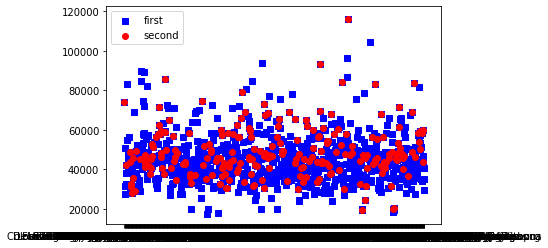

In [63]:
#Scatter Plot of Median Earnings in Most Populous Locale vs Average Locale
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(locale_df['School Name'], locale_df['10 Year Median Earnings'], c='b', marker="s", label='first')
ax1.scatter(large_city_locale_df['School Name'], large_city_locale_df['10 Year Median Earnings'], c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.savefig("Stewart1.png")
plt.show()

In [64]:
stats.ttest_ind(large_city_locale_df['10 Year Median Earnings'], locale_df['10 Year Median Earnings'], axis=0)

Ttest_indResult(statistic=3.657835531380617, pvalue=0.0002652971253478196)

<Figure size 1440x216 with 0 Axes>

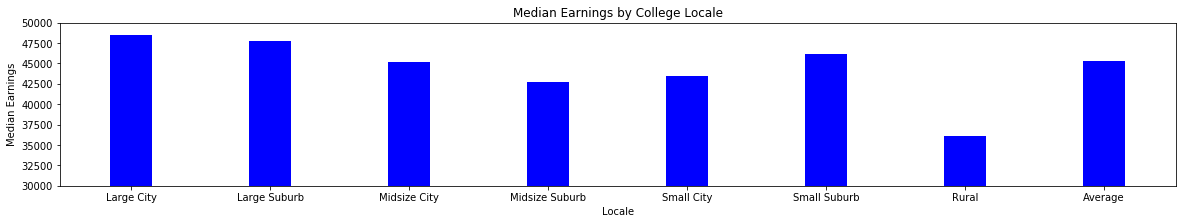

<Figure size 1440x216 with 0 Axes>

In [65]:
#Bar Chart comparing Median Earnings in Key Locale Types
x_axis = np.arange(len(localedata_df['Locale']))

plt.figure(figsize=(20, 3)) 
plt.bar(x_axis, localedata_df['Median Earnings'], color="b", align="center", width=0.3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, localedata_df['Locale'])
plt.ylim(30000, 50000)

plt.title("Median Earnings by College Locale")
plt.xlabel("Locale")
plt.ylabel("Median Earnings")  

plt.figure(figsize=(20, 3)) 

In [66]:
plt.savefig("Stewart2.png")

<Figure size 432x288 with 0 Axes>